In [107]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

In [123]:
%ls eia
saudi_prod = pd.read_csv("eia/saudi_production.csv")
opec_prod = pd.read_csv("eia/opec_spare_capacity.csv")
suply_prod = pd.read_csv("eia/Supply_summary.csv")

oecd_demand = pd.read_csv("eia/OECD_consumption.csv")
nonoecd_demand = pd.read_csv("eia/nonOECD_consumption.csv")

Markets_interest.csv     PET_CRD_CRPDN_ADC_MBBL_M.xls
nonOECD_consumption.csv  saudi_production.csv
nonOPEC_production.csv   Supply_summary.csv
OECD_consumption.csv     table3c_M_199701-201712.csv
opec_spare_capacity.csv  table4a_M_201101-201712.csv


In [124]:
def f (db,start="01/01/2001", p=62, freq="Q" ):
    index = pd.date_range(start, periods=p, freq=freq)
    db.index = index
    if "Date" in db.columns or "Date.1" in db.columns:
        db = db.drop(labels= ["Date", "Date.1"], axis=1)
    return db
    

# Produção

Está sendo utilizados dos bancos de dados de produção:

* saudi_prod
* opec_prod

## Produção na Arabia Saudita

,Saudi Production Change,WTI Production Change
count,62.000000,62.000000
mean,0.111290,7.586774
std,0.682316,33.349142
min,-1.190000,-55.910000
25%,-0.375000,-8.340000
50%,0.190000,8.115000
75%,0.660000,30.290000
max,1.690000,90.520000


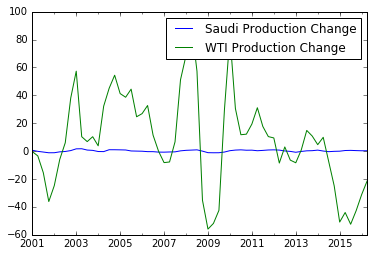

In [110]:
saudi_prod = f(saudi_prod)
saudi_prod.plot()
saudi_prod.describe()

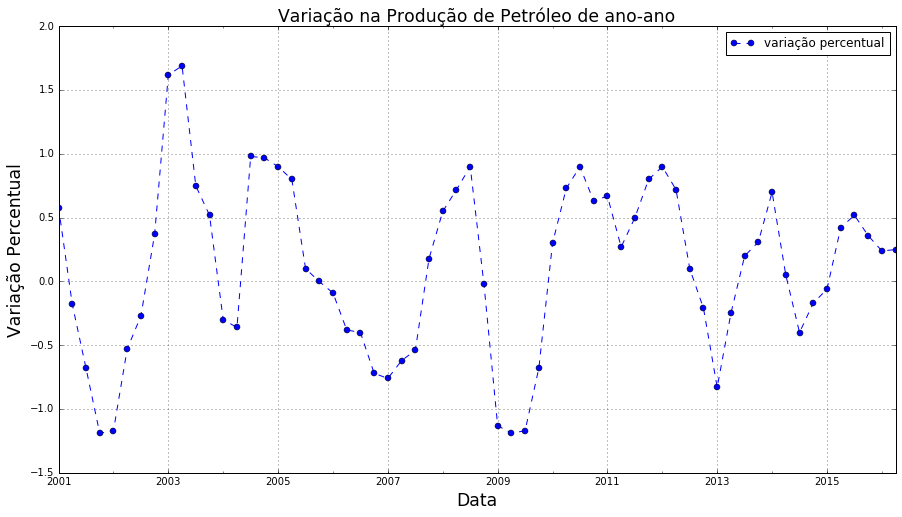

In [111]:
ax = saudi_prod.plot( y=saudi_prod.columns[0], figsize=(15,8), marker="o", linestyle="--", grid=True)

ax.set_title("Variação na Produção de Petróleo de ano-ano", fontsize="xx-large")
ax.set_ylabel("Variação Percentual", fontsize="xx-large")
ax.set_xlabel("Data", fontsize="xx-large")

ax.legend(["variação percentual"], loc=0)

plt.savefig("arabiasaudita.pdf", format="pdf", ax = ax)

## Capacidade de Produção mundial

A capacidade para levar petróleo ao mercado em  no máximo vinte dias é chamada spare capacidade. Estes dados mostram a variação desta capacidade em trimestre. 

In [126]:
opec_prod = f(opec_prod, p=68)

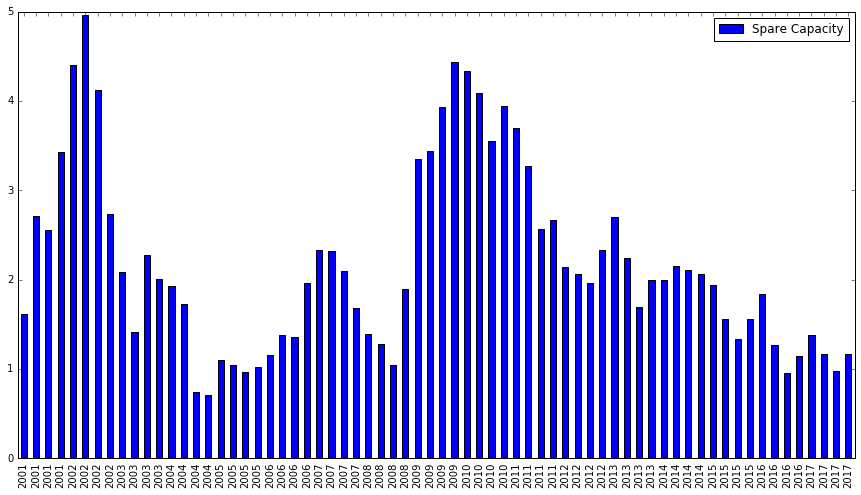

In [127]:
opec_prod.plot(x=opec_prod.index.year, y=opec_prod.columns[0], kind="bar" , figsize=(15,8))

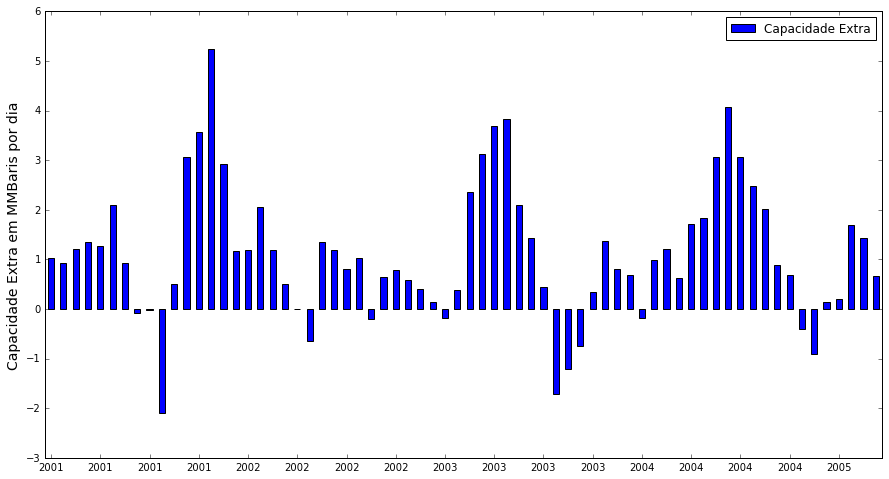

In [114]:

#years = mdates.YearLocator()
#ax.xaxis.set_major_locator(years)


ax = opec_prod.plot(x=opec_prod.index.year, y=opec_prod.columns[0], kind="bar" , figsize=(15,8))
ax.set_ylabel("Capacidade Extra em MMBaris por dia", fontsize=14)
xticks = ax.get_xticklabels()
ax.xaxis.major.locator.set_params(nbins=len(xticks)/4)
ax.set_xticklabels(xticks, rotation=0)
ax.legend(["Capacidade Extra"], loc=0)
plt.savefig("capaExtra.pdf", format="pdf", ax = ax)

#xtic = ax.get_xticks()
#xtic.set
#ax.set_xticklabels(nbins=10)
#ax.fmt_xdata = mdates.DateFormatter("%Y-%m-%d")
#yearsFmt = mdates.DateFormatter("%Y")
#xax = ax.get_xaxis()
#xax.axis_date()

#fmt = xax.get_major_formatter()
#xax.set_major_formatter(yearsFmt)


#ax.xaxis.set_major_formatter(yearsFmt)

#ax.set_yticks()
#ax.tick_params(axis="y")
#xticklabels =  ax.get_xticklabels()
#xticks = ax.get_xticks()


In [115]:
opec_prod.head()

,Capacity percent change,World GDP Change,WTI Real Price (GDP Deflated)
2001-03-31,1.02,3.40,35.03
2001-06-30,0.92,2.60,33.77
2001-09-30,1.20,2.10,32.19
2001-12-31,1.35,1.80,24.60
2002-03-31,1.27,2.19,25.93


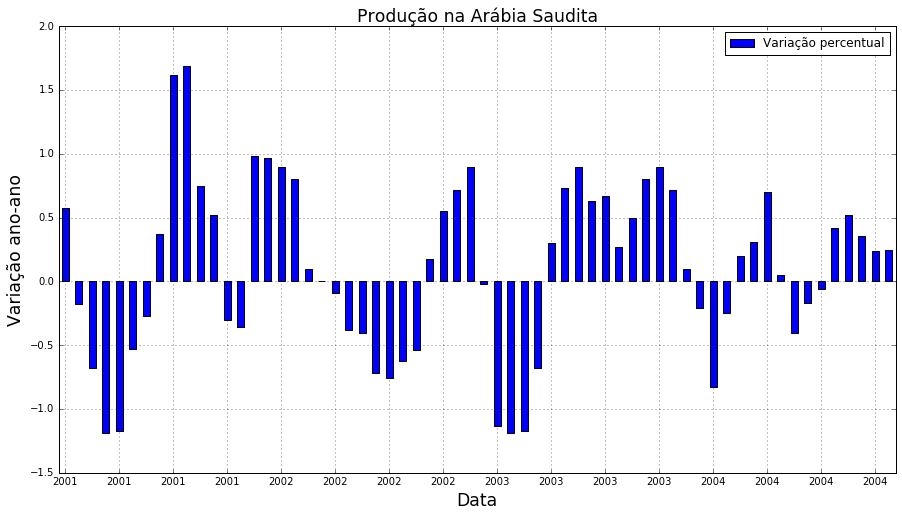

In [116]:
ax = saudi_prod.plot(x=saudi_prod.index.year, y=saudi_prod.columns[0], figsize=(15,8), grid=True, kind="bar")

ax.set_title("Produção na Arábia Saudita", fontsize="xx-large")
ax.set_ylabel("Variação ano-ano", fontsize="xx-large")
ax.set_xlabel("Data", fontsize="xx-large")

xticks = ax.get_xticklabels()
ax.xaxis.major.locator.set_params(nbins=len(xticks)/4)
ax.set_xticklabels(xticks, rotation=0)
ax.legend(["Variação percentual"], loc=0)

plt.savefig("prodArabia.pdf", format="pdf",ax = ax)

## Demanada em paíse não pertencentes a OECD

In [117]:
nonoecd_demand= f(nonoecd_demand, p=68)


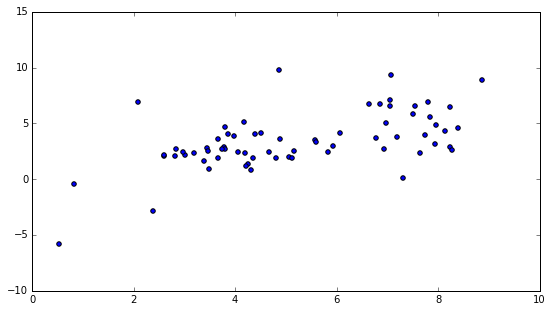

In [118]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(nonoecd_demand.iloc[:,1], nonoecd_demand.iloc[:,0])

# Demanda 

* oecd_demand
* nonoecd_demand

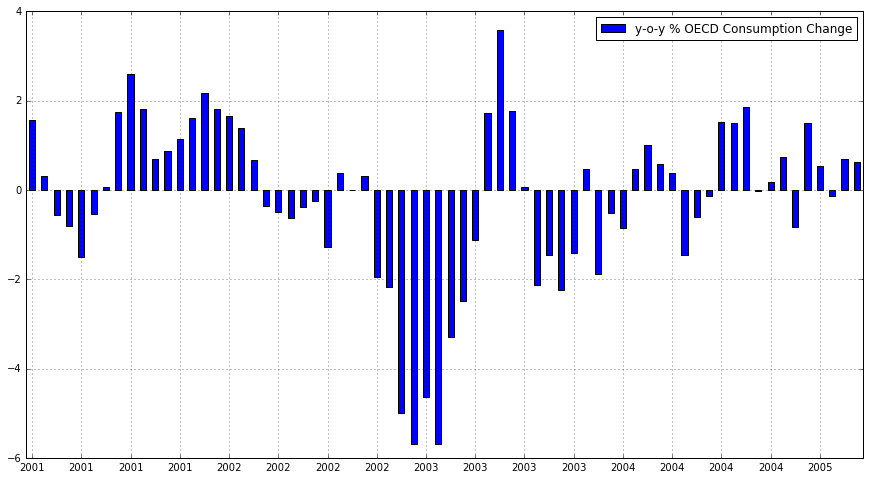

In [119]:
oecd_demand = f(oecd_demand, p=68)
oecd_demand.describe()
ax = oecd_demand.plot(x=oecd_demand.index.year, y=oecd_demand.columns[0], figsize=(15,8), kind="bar", grid=True)


xticks = ax.get_xticklabels()
ax.xaxis.major.locator.set_params(nbins=len(xticks)/4)
ax.set_xticklabels(xticks, rotation=0)

In [120]:
nonoecd_demand = f(nonoecd_demand, p=68)
nonoecd_demand.describe()


,non-OECD Consumption Growth,non-OECD GDP growth
count,68.000000,68.000000
mean,3.423235,5.202647
std,2.524608,2.046534
min,-5.840000,0.520000
25%,2.190000,3.722500
50%,2.885000,4.830000
75%,4.580000,7.062500
max,9.800000,8.860000


## Exportando O banco de dados organizado

O objetivo é uma análise de impacto deste conjunto de features

* oecd_demand
* nonoecd_demand

+ saudi_prod
+ opec_prod

In [121]:
oecd_demand.head()

,y-o-y % OECD Consumption Change,WTI Real Price (GDP Deflated)
2001-03-31,1.57,35.03
2001-06-30,0.32,33.77
2001-09-30,-0.57,32.19
2001-12-31,-0.80,24.60
2002-03-31,-1.51,25.93


In [128]:
export = pd.DataFrame()
export = pd.concat([oecd_demand["y-o-y % OECD Consumption Change"], 
               nonoecd_demand["non-OECD Consumption Growth"],
               saudi_prod["Saudi Production Change"],
              opec_prod["Spare Capacity"]], join="inner", axis=1)

export.head()

,y-o-y % OECD Consumption Change,non-OECD Consumption Growth,Saudi Production Change,Spare Capacity


In [ ]:
ax = export.plot(figsize=(15,8), marker="o", linestyle="-.")
ax.set_title("Veriáveis independentes.", fontsize="xx-large")
ax.set_ylabel("Variação percentual", fontsize="xx-large")
ax.set_xlabel("Data", fontsize="xx-large")

plt.savefig("variaveisInd.pdf", format="pdf",ax = ax)

In [ ]:
cor = export.corr()
cor.to_excel("correlacao.xls")
cor.to_html("correlacao.html")

In [ ]:
cor.to_latex(decimal=",")

In [ ]:
export_wti = pd.concat([export, opec_prod["WTI Real Price (GDP Deflated)"]], join="inner", axis=1)
axes = export_wti.plot(figsize=(18,8), marker="o", grid=True)

liness = ("--", "-.", "-", ":", "-") 

for i, style in enumerate(liness):
    axes.lines[i].set_linestyle(style)


In [ ]:
export.to_csv("oil_features.csv")
